In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df_udp = pd.read_csv(r'C:\data_science_iforest_ddos\dataset\training\CSV-01-12\01-12\DrDoS_UDP.csv', index_col=0)
df_dns = pd.read_csv(r'C:\data_science_iforest_ddos\dataset\training\CSV-01-12\01-12\DrDoS_DNS.csv', index_col=0)
df_ntp = pd.read_csv(r'C:\data_science_iforest_ddos\dataset\training\CSV-01-12\01-12\DrDoS_NTP.csv', index_col=0)

C:\Users\talle\AppData\Local\Temp\ipykernel_2292\254610171.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_udp = pd.read_csv(r'C:\data_science_iforest_ddos\dataset\training\CSV-01-12\01-12\DrDoS_UDP.csv', index_col=0)
C:\Users\talle\AppData\Local\Temp\ipykernel_2292\254610171.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dns = pd.read_csv(r'C:\data_science_iforest_ddos\dataset\training\CSV-01-12\01-12\DrDoS_DNS.csv', index_col=0)
C:\Users\talle\AppData\Local\Temp\ipykernel_2292\254610171.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ntp = pd.read_csv(r'C:\data_science_iforest_ddos\dataset\training\CSV-01-12\01-12\DrDoS_NTP.csv', index_col=0)


In [3]:
df_test = pd.read_csv(r'C:\data_science_iforest_ddos\dataset\tests\CSV-03-11\03-11\UDP.csv', index_col=0)

C:\Users\talle\AppData\Local\Temp\ipykernel_2292\3215647446.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv(r'C:\data_science_iforest_ddos\dataset\tests\CSV-03-11\03-11\UDP.csv', index_col=0)


In [4]:
df_list = [df_udp, df_dns, df_ntp]

In [5]:
print('UDP:', df_udp.shape, '\nDNS: ', df_dns.shape, '\nNTP:', df_ntp.shape)

UDP: (3136802, 87) 
DNS:  (5074413, 87) 
NTP: (1217007, 87)


In [6]:
df_dns[' Label']

Unnamed: 0
425      DrDoS_DNS
430      DrDoS_DNS
1654     DrDoS_DNS
2927     DrDoS_DNS
694      DrDoS_DNS
           ...    
6364     DrDoS_DNS
5576     DrDoS_DNS
26506    DrDoS_DNS
18736    DrDoS_DNS
2811     DrDoS_DNS
Name:  Label, Length: 5074413, dtype: object

In [7]:
concat_df = pd.concat(df_list, ignore_index=True)

In [8]:
concat_df.shape

(9428222, 87)

In [9]:
concat_df.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [10]:
concat_df.columns = concat_df.columns.str.strip()
df_test.columns = df_test.columns.str.strip()

In [11]:
concat_df.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [12]:
concat_df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-43443-6652-17,172.16.0.5,43443,192.168.50.1,6652,17,2018-12-01 12:36:57.628026,218395,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
1,172.16.0.5-192.168.50.1-54741-9712-17,172.16.0.5,54741,192.168.50.1,9712,17,2018-12-01 12:36:57.628076,108219,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
2,172.16.0.5-192.168.50.1-56589-4680-17,172.16.0.5,56589,192.168.50.1,4680,17,2018-12-01 12:36:57.628164,104579,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
3,172.16.0.5-192.168.50.1-40233-2644-17,172.16.0.5,40233,192.168.50.1,2644,17,2018-12-01 12:36:57.628166,110967,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
4,172.16.0.5-192.168.50.1-33989-16901-17,172.16.0.5,33989,192.168.50.1,16901,17,2018-12-01 12:36:57.628217,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP


In [13]:
concat_df.isna().sum()

Flow ID             0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Max            0
Idle Min            0
SimillarHTTP        0
Inbound             0
Label               0
Length: 87, dtype: int64

In [14]:
df_test.isna().sum()

Flow ID             0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
                   ..
Idle Max            0
Idle Min            0
SimillarHTTP        0
Inbound             0
Label               0
Length: 87, dtype: int64

In [15]:
concat_df.dtypes

Flow ID              object
Source IP            object
Source Port           int64
Destination IP       object
Destination Port      int64
                     ...   
Idle Max            float64
Idle Min            float64
SimillarHTTP         object
Inbound               int64
Label                object
Length: 87, dtype: object

In [16]:
concat_df['Label'].value_counts()

Label
DrDoS_DNS    5071011
DrDoS_UDP    3134645
DrDoS_NTP    1202642
BENIGN         19924
Name: count, dtype: int64

In [17]:
df_test['Label'].value_counts()

Label
UDP       3754680
MSSQL       24392
BENIGN       3134
Name: count, dtype: int64

<h1 style="color: rgb(100, 200, 34);">Diminuindo o Dataset de Teste</h1>

In [18]:
df_test_benign = df_test[df_test['Label'] == 'BENIGN']
df_test_benign.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
41741,192.168.10.50-192.168.50.8-21-60319-6,192.168.50.8,60319,192.168.10.50,21,6,2018-11-03 10:42:57.648027,9015834,6,0,...,0.000000,3009701.0,3009701.0,6.006131e+06,0.000000e+00,6006131.0,6006131.0,0,1,BENIGN
63,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 10:42:57.699191,113498356,52,0,...,28.810772,106.0,5.0,9.458180e+06,3.307888e+05,9909241.0,9048680.0,0,0,BENIGN
93238,192.168.50.6-23.194.142.213-55650-443-6,192.168.50.6,55650,23.194.142.213,443,6,2018-11-03 10:42:58.393445,56638650,26,24,...,107279.792294,289179.0,20805.0,9.365196e+06,1.338180e+06,10010988.0,6649735.0,0,0,BENIGN
42899,192.168.50.6-4.2.2.4-52485-53-17,192.168.50.6,52485,4.2.2.4,53,17,2018-11-03 10:42:58.393567,21234,2,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,BENIGN
111954,192.168.50.6-72.21.91.29-55656-80-6,192.168.50.6,55656,72.21.91.29,80,6,2018-11-03 10:42:58.402896,56653775,14,12,...,188.881974,28417.0,27941.0,9.414137e+06,1.452976e+06,10019426.0,6448290.0,0,0,BENIGN


In [19]:
df_test_benign.shape

(3134, 87)

In [20]:
df_test_malign = df_test[df_test['Label'] == 'UDP']
df_test_malign.head(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
83785,172.16.0.5-192.168.50.4-27799-14566-17,172.16.0.5,27799,192.168.50.4,14566,17,2018-11-03 10:52:00.076641,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP
44813,172.16.0.5-192.168.50.4-61850-2225-17,172.16.0.5,61850,192.168.50.4,2225,17,2018-11-03 10:52:00.153256,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP
72764,172.16.0.5-192.168.50.4-61850-3815-17,172.16.0.5,61850,192.168.50.4,3815,17,2018-11-03 10:52:00.217932,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP


In [21]:
df_test_malign.shape

(3754680, 87)

In [22]:
n_attacks = len(df_test_benign) / 1.5
n_attacks

2089.3333333333335

In [23]:
df_test_malign = df_test_malign.sample(n=int(n_attacks), random_state=42)
df_test_malign.shape

(2089, 87)

In [24]:
df_test_concat = pd.concat([df_test_benign, df_test_malign])

In [25]:
df_test_concat.shape

(5223, 87)

## Diminuindo o Dataset de Treino

In [26]:
df_benign = concat_df[concat_df['Label'] == 'BENIGN']
df_benign.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
29378,192.168.10.50-192.168.50.8-22-59643-6,192.168.50.8,59643,192.168.10.50,22,6,2018-12-01 12:37:02.186488,1,2,0,...,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,1,BENIGN
33433,192.168.50.6-23.194.142.15-57664-443-6,192.168.50.6,57664,23.194.142.15,443,6,2018-12-01 12:37:03.069132,266,5,0,...,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,0,BENIGN
33436,192.168.50.6-23.194.142.15-57664-443-6,192.168.50.6,57664,23.194.142.15,443,6,2018-12-01 12:37:03.069399,20637,1,5,...,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,0,BENIGN
33530,192.168.50.6-23.194.142.15-57664-443-6,23.194.142.15,443,192.168.50.6,57664,6,2018-12-01 12:37:03.090080,148,1,2,...,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,1,BENIGN
34281,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-12-01 12:37:03.267708,113580323,42,0,...,1.199478e+06,4155120.0,3.0,9118762.25,1.172700e+06,9958914.0,5512480.0,0,0,BENIGN


In [27]:
n_attacks = len(df_benign) / 4
n_attacks

4981.0

In [28]:
df_malign_dns = concat_df[concat_df['Label'] == 'DrDoS_DNS']
df_malign_udp = concat_df[concat_df['Label'] == 'DrDoS_UDP']
df_malign_ntp = concat_df[concat_df['Label'] == 'DrDoS_NTP']

In [29]:
df_malign_dns['Label'].value_counts()

Label
DrDoS_DNS    5071011
Name: count, dtype: int64

In [30]:
df_malign_udp['Label'].value_counts()

Label
DrDoS_UDP    3134645
Name: count, dtype: int64

In [31]:
df_malign_ntp['Label'].value_counts()


Label
DrDoS_NTP    1202642
Name: count, dtype: int64

In [32]:
total_attacks = len(df_malign_dns) + len(df_malign_ntp) + len(df_malign_udp)
total_attacks

9408298

In [33]:
dns_frac = len(df_malign_dns) / total_attacks
udp_frac = len(df_malign_udp) / total_attacks
ntp_frac = len(df_malign_ntp) / total_attacks
print('DNS: ', dns_frac, '\nUDP: ', udp_frac, '\nNTP: ', ntp_frac)

DNS:  0.5389934502499815 
UDP:  0.33317875347910964 
NTP:  0.12782779627090893


In [34]:
dns_sample = df_malign_dns.sample(n=int(n_attacks * dns_frac), random_state=42)
udp_sample = df_malign_udp.sample(n=int(n_attacks * udp_frac), random_state=42)
ntp_sample = df_malign_ntp.sample(n=int(n_attacks * ntp_frac), random_state=42)
print('DNS: ', len(dns_sample), '\nUDP: ', len(udp_sample), '\nNTP: ', len(ntp_sample))

DNS:  2684 
UDP:  1659 
NTP:  636


In [35]:
df_attacks = pd.concat([dns_sample, udp_sample, ntp_sample])
df_attacks.shape

(4979, 87)

In [36]:
small_concat_df = pd.concat([df_benign, df_attacks], ignore_index=True)

In [37]:
small_concat_df['Label'] = small_concat_df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [38]:
small_concat_df['Label'].value_counts()

Label
0    19924
1     4979
Name: count, dtype: int64

In [39]:
# small_concat_df[concat_df.duplicated()]

## Retirar Colunas/Features não importantes 

In [40]:
small_concat_df['SimillarHTTP'].value_counts()

SimillarHTTP
0                                                                                     17286
0                                                                                      6831
ocsp.pki.goog/GTSGIAG3                                                                  111
ocsp.digicert.com/                                                                       96
drmokhberi.ca/favicon.ico                                                                22
                                                                                      ...  
talebi.ca/wp-content/plugins/wpdiscuz/utils/captcha/captcha.php?key=c5c029d5fedbb7        1
0.gravatar.com/avatar/?s=48&d=mm&r=g                                                      1
talebi.ca/wp-content/plugins/wpdiscuz/utils/captcha/captcha.php?key=c5c029ef1bbdf9        1
talebi.ca/wp-content/plugins/wpdiscuz/utils/captcha/captcha.php?key=c5c029ef1bc09a        1
205.174.165.72/c.php?ip=10.148.118.37                              

In [41]:
columns_drop = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Timestamp', 'SimillarHTTP']
small_concat_df = small_concat_df.drop(columns=columns_drop)

In [42]:
df_test_concat = df_test_concat.drop(columns=columns_drop)

In [43]:
small_concat_df.shape

(24903, 80)

In [44]:
df_test_concat.shape

(5223, 80)

In [45]:
pd.set_option('display.max_columns', None)

In [46]:
small_concat_df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,6,1,2,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,56,0,2.000000e+06,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,0.000000,0.0,0.0,56,0,0,0,0,0,0,2,0,0,0,8192,-1,0,28,0.00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1,0
1,6,266,5,0,154.0,0.0,46.0,0.0,30.8,18.780309,0.0,0.0,0.0,0.000000,578947.368421,1.879699e+04,6.650000e+01,1.310000e+02,263.0,1.0,266.0,6.650000e+01,1.310000e+02,263.0,1.0,0.0,0.00,0.0,0.0,0.0,1,0,0,0,100,0,1.879699e+04,0.000000,0.0,46.0,33.333333,17.907168,320.666667,0,0,1,0,0,1,0,0,0.0,40.000000,30.8,0.0,100,0,0,0,0,0,0,5,154,0,0,256,-1,3,20,0.00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,0
2,6,20637,1,5,0.0,62.0,0.0,0.0,0.0,0.000000,31.0,0.0,12.4,16.979399,3004.312642,2.907399e+02,4.127400e+03,9.226352e+03,20632.0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,5.0,1.25,0.5,2.0,1.0,0,0,0,0,20,100,4.845666e+01,242.283278,0.0,31.0,8.857143,15.126451,228.809524,0,0,0,0,0,1,1,0,5.0,10.333333,0.0,12.4,20,0,0,0,0,0,0,1,0,5,62,256,254,0,20,0.00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,0
3,6,148,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.027027e+04,7.400000e+01,1.032376e+02,147.0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,1.00,0.0,1.0,1.0,0,0,0,0,20,40,6.756757e+03,13513.513514,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,1,1,0,2.0,0.000000,0.0,0.0,20,0,0,0,0,0,0,1,0,2,0,254,0,0,20,0.00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1,0
4,0,113580323,42,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,3.697824e-01,2.770252e+06,4.229563e+06,9958914.0,1.0,113580323.0,2.770252e+06,4.229563e+06,9958914.0,1.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,3.697824e-01,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,42,0,0,0,-1,-1,0,0,346264.25,1.199478e+06,4155120.0,3.0,9118762.25,1.172700e+06,9958914.0,5512480.0,0,0


In [47]:
small_concat_df.dtypes

Protocol                         int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets    float64
                                ...   
Idle Std                       float64
Idle Max                       float64
Idle Min                       float64
Inbound                          int64
Label                            int64
Length: 80, dtype: object

## Separando as variáveis de entrada (X) e saída (y)

In [48]:
df_benign = small_concat_df[small_concat_df['Label'] == 0]
df_malign = small_concat_df[small_concat_df['Label'] == 1]

In [49]:
X_benign = df_benign.drop('Label', axis=1)
y_benign = df_benign['Label']

In [50]:
X_test_final = df_test_concat.drop('Label', axis=1)
y_test_final = df_test_concat['Label']

## Análise de Variância

In [51]:
X_benign.dtypes.to_list()

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('fl

In [52]:
X_benign.max().to_list()

[17.0,
 119995906.0,
 5063.0,
 4602.0,
 15266416.0,
 10993758.0,
 32120.0,
 2020.0,
 3015.2905392059947,
 2221.556055317442,
 37960.0,
 1460.0,
 5011.060158910329,
 7045.095259550461,
 inf,
 inf,
 36337109.66666666,
 62937575.51667919,
 119948019.0,
 10493465.0,
 119995906.0,
 28077142.333333336,
 56020637.66705328,
 119948019.0,
 10493465.0,
 119841028.0,
 54505582.0,
 77082530.46101172,
 109011162.0,
 238.0,
 1.0,
 0.0,
 0.0,
 0.0,
 101260.0,
 147280.0,
 3000000.0,
 2000000.0,
 1460.0,
 37960.0,
 4023.9453551912575,
 6616.562066006961,
 43778893.573322296,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 23.0,
 4025.778587699317,
 3015.290539206005,
 5011.060158910329,
 101260.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5063.0,
 15266416.0,
 4602.0,
 10993758.0,
 65535.0,
 65535.0,
 5043.0,
 1480.0,
 10610243.0,
 11005624.902538748,
 19416375.0,
 10610243.0,
 111950464.0,
 66002917.44011336,
 111950464.0,
 111950464.0,
 1.0]

In [53]:
X_test_final.max().to_list()

[17.0,
 119995583.0,
 826.0,
 1347.0,
 102472.0,
 2466308.0,
 3495.0,
 1460.0,
 1460.0,
 1405.15609199019,
 3621.0,
 327.0,
 1830.9636228656263,
 1036.5547268110242,
 inf,
 inf,
 17142226.142857146,
 28504439.935444903,
 95009256.0,
 7009992.0,
 119995583.0,
 20526321.8,
 41778630.37881389,
 95029886.0,
 7009992.0,
 119618899.0,
 20526332.4,
 41822303.77396809,
 95113337.0,
 97.0,
 1.0,
 0.0,
 0.0,
 0.0,
 26448.0,
 43120.0,
 3000000.0,
 2000000.0,
 531.0,
 3621.0,
 1289.2941176470588,
 1045.9653370163446,
 1094043.4862397157,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 10.0,
 1463.0,
 1460.0,
 1830.9636228656277,
 26448.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 826.0,
 102472.0,
 1347.0,
 2466308.0,
 64285.0,
 65535.0,
 216.0,
 389.0,
 10863883.0,
 8246153.796382974,
 16130150.0,
 10863883.0,
 94983207.0,
 61880062.05594064,
 95009256.0,
 94983207.0,
 1.0]

In [54]:
X_benign.replace([np.inf, -np.inf], np.nan, inplace=True)

In [55]:
X_benign.fillna(X_benign.mean(), inplace=True)

In [56]:
X_test_final.replace([np.inf, -np.inf], np.nan, inplace=True)

In [57]:
X_test_final.fillna(X_test_final.mean(), inplace=True)

In [58]:
variance = VarianceThreshold(threshold=0.01)
X_variance_benign = variance.fit_transform(X_benign)

In [59]:
X_variance_benign   

array([[6.0000e+00, 1.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [6.0000e+00, 2.6600e+02, 5.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.0000e+00, 2.0637e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [6.0000e+00, 2.2800e+02, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.7000e+01, 4.7709e+04, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.0000e+00, 3.2201e+05, 3.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], shape=(19924, 66))

In [60]:
variance_columns = X_benign.columns[variance.get_support()]

In [61]:
X_variance_df = pd.DataFrame(X_variance_benign, columns=variance_columns, index=X_benign.index)

In [62]:
X_variance_df.shape

(19924, 66)

In [63]:
X_variance_df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,6.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,56.0,0.0,2.000000e+06,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,56.0,2.0,0.0,0.0,0.0,8192.0,-1.0,0.0,28.0,0.00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1.0
1,6.0,266.0,5.0,0.0,154.0,0.0,46.0,0.0,30.8,18.780309,0.0,0.0,0.0,0.000000,578947.368421,1.879699e+04,6.650000e+01,1.310000e+02,263.0,1.0,266.0,6.650000e+01,1.310000e+02,263.0,1.0,0.0,0.00,0.0,0.0,0.0,1.0,100.0,0.0,1.879699e+04,0.000000,0.0,46.0,33.333333,17.907168,320.666667,1.0,0.0,1.0,0.0,0.0,40.000000,30.8,0.0,100.0,5.0,154.0,0.0,0.0,256.0,-1.0,3.0,20.0,0.00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0.0
2,6.0,20637.0,1.0,5.0,0.0,62.0,0.0,0.0,0.0,0.000000,31.0,0.0,12.4,16.979399,3004.312642,2.907399e+02,4.127400e+03,9.226352e+03,20632.0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,5.0,1.25,0.5,2.0,1.0,0.0,20.0,100.0,4.845666e+01,242.283278,0.0,31.0,8.857143,15.126451,228.809524,0.0,0.0,1.0,1.0,5.0,10.333333,0.0,12.4,20.0,1.0,0.0,5.0,62.0,256.0,254.0,0.0,20.0,0.00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0.0
3,6.0,148.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.027027e+04,7.400000e+01,1.032376e+02,147.0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,1.00,0.0,1.0,1.0,0.0,20.0,40.0,6.756757e+03,13513.513514,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,2.0,0.000000,0.0,0.0,20.0,1.0,0.0,2.0,0.0,254.0,0.0,0.0,20.0,0.00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1.0
4,0.0,113580323.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,3.697824e-01,2.770252e+06,4.229563e+06,9958914.0,1.0,113580323.0,2.770252e+06,4.229563e+06,9958914.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3.697824e-01,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,42.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,346264.25,1.199478e+06,4155120.0,3.0,9118762.25,1.172700e+06,9958914.0,5512480.0,0.0


## Análise de Correlação do Treino

Matriz de correlação de Pearson

In [64]:
corr_matrix = X_variance_df.corr().abs()

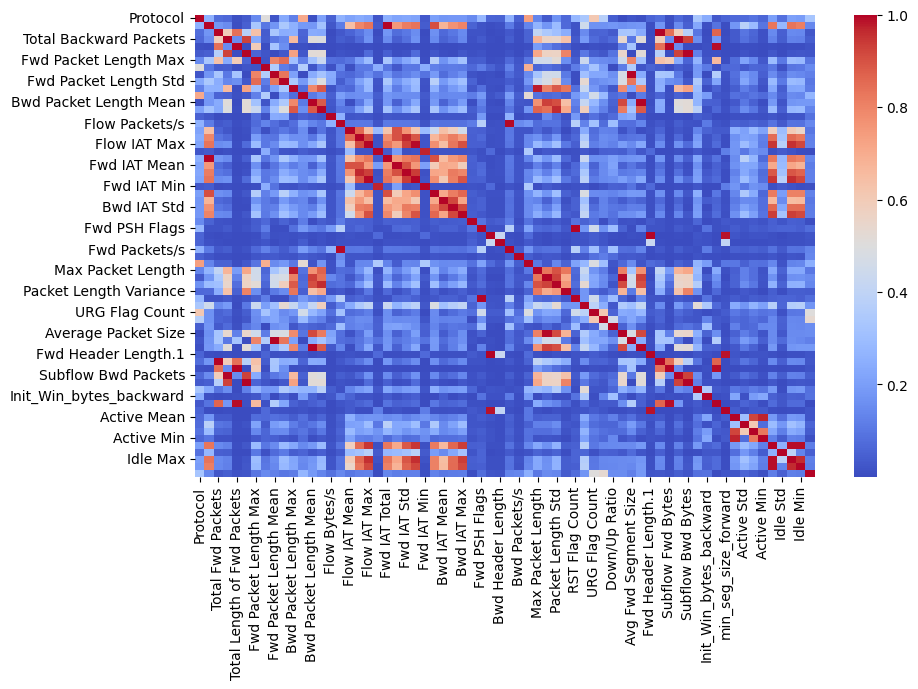

In [65]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [66]:
# Parte superior da matriz para evitar repetição de pares
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.shape

(66, 66)

In [67]:
to_drop = []

for column in upper.columns:
    # Encontra as colunas com correlação alta com a atual
    high_corr = upper[column][upper[column] > 0.9].index.tolist()
    for correlated_column in high_corr:
        # Calcula a variância das duas colunas
        var_column = X_benign[column].var()
        var_correlated = X_benign[correlated_column].var()

        # Escolhe a coluna com menor variância para eliminar
        if var_column < var_correlated:
            to_drop.append(column)
        else:
            to_drop.append(correlated_column)


In [68]:
to_drop = list(set(to_drop))

print(f'Colunas que serão removidas por correlação + baixa variância: {to_drop}')

Colunas que serão removidas por correlação + baixa variância: ['Fwd Header Length', 'Fwd IAT Max', 'Packet Length Mean', 'Flow IAT Min', 'Subflow Bwd Packets', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd IAT Mean', 'Active Mean', 'Flow IAT Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Max', 'Fwd Packet Length Mean', 'Avg Bwd Segment Size', 'Idle Mean', 'Total Length of Fwd Packets', 'Bwd IAT Total', 'Fwd PSH Flags', 'Total Length of Bwd Packets', 'Idle Min', 'act_data_pkt_fwd', 'Fwd IAT Total', 'Bwd IAT Max', 'Idle Max', 'Bwd IAT Std', 'Active Min', 'Fwd IAT Std', 'Bwd IAT Mean', 'Fwd Packets/s', 'Packet Length Std', 'min_seg_size_forward', 'Average Packet Size']


In [69]:
X_reduced_corr = X_benign.drop(columns=to_drop)

In [70]:
X_reduced_corr.shape

(19924, 47)

In [71]:
X_reduced_corr

,Protocol,Flow Duration,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Max,Fwd IAT Min,Bwd IAT Min,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Bwd Header Length,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Fwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Std,Active Max,Idle Std,Inbound
0,6,1,0.0,0.0,0.000000,0.0,0.000000,0.000000,2.000000e+06,1.000000e+00,1.0,1.0,0.0,0,0,0,0,0.000000,0.0,0.0,0.000000,0,0,0,0,1,0,0,0,0.0,0.000000,56,0,0,0,0,0,0,2,0,0,8192,-1,0.000000e+00,0.0,0.000000e+00,1
1,6,266,46.0,0.0,18.780309,0.0,0.000000,578947.368421,1.879699e+04,6.650000e+01,263.0,1.0,0.0,0,0,0,0,0.000000,0.0,46.0,320.666667,0,0,1,0,0,1,0,0,0.0,30.800000,100,0,0,0,0,0,0,5,154,0,256,-1,0.000000e+00,0.0,0.000000e+00,0
2,6,20637,0.0,0.0,0.000000,0.0,16.979399,3004.312642,2.907399e+02,4.127400e+03,20632.0,0.0,1.0,0,0,0,100,242.283278,0.0,31.0,228.809524,0,0,0,0,0,1,1,0,5.0,0.000000,20,0,0,0,0,0,0,1,0,62,256,254,0.000000e+00,0.0,0.000000e+00,0
3,6,148,0.0,0.0,0.000000,0.0,0.000000,0.000000,2.027027e+04,7.400000e+01,147.0,0.0,1.0,0,0,0,40,13513.513514,0.0,0.0,0.000000,0,0,0,0,0,1,1,0,2.0,0.000000,20,0,0,0,0,0,0,1,0,0,254,0,0.000000e+00,0.0,0.000000e+00,1
4,0,113580323,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.697824e-01,2.770252e+06,9958914.0,1.0,0.0,0,0,0,0,0.000000,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,0.0,0.000000,0,0,0,0,0,0,0,42,0,0,-1,-1,1.199478e+06,4155120.0,1.172700e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19919,6,550740,0.0,0.0,0.000000,31.0,0.000000,56.287904,5.447216e+00,2.753700e+05,550737.0,3.0,0.0,0,0,0,20,1.815739,0.0,31.0,240.250000,0,0,0,0,0,1,0,0,0.0,0.000000,40,0,0,0,0,0,0,2,0,31,30016,64095,0.000000e+00,0.0,0.000000e+00,1
19920,6,337766,31.0,31.0,0.000000,0.0,17.897858,275.338548,1.184252e+01,1.125887e+05,337762.0,0.0,1.0,0,0,0,60,8.881889,0.0,31.0,192.200000,0,0,1,0,0,1,1,0,3.0,31.000000,20,0,0,0,0,0,0,1,31,62,64095,30016,0.000000e+00,0.0,0.000000e+00,0
19921,6,228,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.315789e+04,1.140000e+02,225.0,0.0,3.0,0,0,0,40,8771.929825,0.0,0.0,0.000000,0,0,0,0,0,1,1,0,2.0,0.000000,20,0,0,0,0,0,0,1,0,0,30016,0,0.000000e+00,0.0,0.000000e+00,1
19922,17,47709,43.0,43.0,0.000000,97.0,0.000000,5868.913622,8.384162e+01,1.590300e+04,47703.0,3.0,3.0,0,0,0,40,41.920812,43.0,97.0,874.800000,0,0,0,0,0,0,0,0,1.0,43.000000,40,0,0,0,0,0,0,2,86,194,-1,-1,0.000000e+00,0.0,0.000000e+00,0


## Normalização dos Dados

Fazer o Hold-Out antes da normalização, a fim de evitar data leak

In [72]:
X_reduced_corr.shape

(19924, 47)

In [73]:
X_train, X_val, y_train, y_val = train_test_split(X_reduced_corr, y_benign, test_size=0.3, random_state=62, stratify=y_benign)

In [74]:
top_features = X_train.columns 
top_features

Index(['Protocol', 'Flow Duration', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Std',
       'Bwd Packet Length Min', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Min',
       'Bwd IAT Min', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Bwd Header Length', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Avg Fwd Segment Size', 'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'Active Std', 'Active Max', 'Idle 

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.71370545, -0.32592354, -0.28018942, ..., -0.16584796,
        -0.10210826, -0.46928588],
       [ 1.27576811, -0.3251955 , -0.22156333, ..., -0.16584796,
        -0.10210826, -0.46928588],
       [-0.71370545, -0.32591823, -0.28018942, ..., -0.16584796,
        -0.10210826,  2.13089725],
       ...,
       [ 1.27576811, -0.32520012, -0.20832518, ..., -0.16584796,
        -0.10210826, -0.46928588],
       [ 1.27576811, -0.32519907, -0.20265169, ..., -0.16584796,
        -0.10210826, -0.46928588],
       [ 1.27576811, -0.32520232, -0.21210751, ..., -0.16584796,
        -0.10210826, -0.46928588]], shape=(13946, 47))

In [76]:
X_val_scaled = scaler.transform(X_val)

In [77]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

In [78]:
X_train_scaled_df.shape

(13946, 47)

In [79]:
X_train_scaled_df.columns

Index(['Protocol', 'Flow Duration', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Std',
       'Bwd Packet Length Min', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Min',
       'Bwd IAT Min', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Bwd Header Length', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Avg Fwd Segment Size', 'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'Active Std', 'Active Max', 'Idle 

In [80]:
X_test_final = X_test_final[top_features]
X_test_final.shape

(5223, 47)

In [81]:
X_test_final_scaled = scaler.transform(X_test_final)

In [82]:
X_test_final_scaled_df = pd.DataFrame(X_test_final_scaled, columns=top_features, index=X_test_final.index)

In [83]:
X_test_final_scaled_df.shape

(5223, 47)

In [84]:
X_test_final_scaled_df.head()

,Protocol,Flow Duration,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Max,Fwd IAT Min,Bwd IAT Min,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Bwd Header Length,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Fwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Std,Active Max,Idle Std,Inbound
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41741,-0.713705,-0.010762,-0.280189,-0.446002,-0.324089,-0.590696,-0.293474,-0.080912,-0.338793,1.399328,0.168680,-0.056455,-0.327232,0.0,0.0,0.0,0.041518,-0.074758,-0.625977,-0.258430,-0.094805,0.0,-0.05938,-0.38312,0.0,2.143377,-0.854811,-0.52452,0.0,-0.960737,-0.446065,0.043445,0.0,0.0,0.0,0.0,0.0,0.0,-0.025428,-0.016209,-0.054189,-0.011755,-0.337799,-0.119676,4.157075,-0.102108,2.130897
63,-1.798873,3.641580,-0.280189,-0.446002,-0.324089,-0.590696,-0.293474,-0.080912,-0.338793,1.795360,0.471110,-0.056455,-0.327232,0.0,0.0,0.0,0.041518,-0.074758,-0.625977,-0.258430,-0.094805,0.0,-0.05938,-0.38312,0.0,-0.466554,-0.854811,-0.52452,0.0,-0.960737,-0.446065,0.043443,0.0,0.0,0.0,0.0,0.0,0.0,0.749513,-0.016209,-0.054189,-0.463725,-0.337799,-0.119542,-0.165696,0.046289,-0.469286
93238,-0.713705,1.653964,5.009397,-0.285982,6.599171,-0.590696,0.333403,-0.080904,-0.338792,0.792303,0.478994,-0.056455,-0.156803,0.0,0.0,0.0,0.041524,-0.074749,-0.625977,1.588448,0.486301,0.0,-0.05938,-0.38312,0.0,-0.466554,1.169849,-0.52452,0.0,-0.960737,6.447804,0.043449,0.0,0.0,0.0,0.0,0.0,0.0,0.311503,0.091216,-0.037845,-0.449823,-0.264348,0.380619,0.249508,0.498220,-0.469286
42899,1.275768,-0.325181,-0.219672,0.407437,-0.324089,1.387653,-0.293474,-0.080590,-0.338417,-0.285073,-0.295057,-0.056455,-0.156803,0.0,0.0,0.0,0.041518,-0.072947,0.622223,-0.173911,-0.091709,0.0,-0.05938,-0.38312,0.0,-0.466554,-0.854811,-0.52452,0.0,0.032918,-0.106272,0.043443,0.0,0.0,0.0,0.0,0.0,0.0,-0.092814,-0.015802,-0.052632,-0.463725,-0.337799,-0.119676,-0.165848,-0.102108,-0.469286
111954,-0.713705,1.654493,-0.268842,-0.285982,-0.324089,-0.590696,-0.293474,-0.080912,-0.338793,1.833522,0.479647,-0.056460,0.013626,0.0,0.0,0.0,0.041522,-0.074754,-0.625977,-0.254468,-0.094795,0.0,-0.05938,-0.38312,0.0,-0.466554,1.169849,-0.52452,0.0,-0.960737,-0.382354,0.043446,0.0,0.0,0.0,0.0,0.0,0.0,0.109344,-0.015675,-0.054189,-0.449713,-0.312285,-0.118795,-0.125032,0.549719,-0.469286


In [85]:
y_test_final = y_test_final.apply(lambda x: 0 if x == 'BENIGN' else 1)

In [86]:
y_test_final.value_counts()

Label
0    3134
1    2089
Name: count, dtype: int64

## Treinamento do Isolation Forest

In [87]:
X_train_scaled_df.shape

(13946, 47)

In [88]:
contamination_rate = float(y_train.sum() / len(y_train))
print(f"Contamination Rate: {contamination_rate:.4f}")

Contamination Rate: 0.0000


In [89]:
model = IsolationForest(max_samples=0.9,n_estimators=107,contamination=0.011, random_state=20)
model.fit(X_train_scaled_df)

,n_estimators,107
,max_samples,0.9
,contamination,0.011
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,20
,verbose,0
,warm_start,False


In [90]:
model.n_features_in_

47

## Predições

In [91]:
y_pred_val = model.predict(X_val_scaled_df)

In [92]:
y_pred_val = np.where(y_pred_val == -1, 1, 0)

In [93]:
y_pred_val

array([0, 0, 0, ..., 0, 0, 0], shape=(5978,))

In [94]:
X_attacks = df_malign.drop('Label', axis=1)

In [95]:
X_attacks.replace([np.inf, -np.inf], np.nan, inplace=True)

In [96]:
X_attacks.fillna(X_attacks.mean(), inplace=True)

In [97]:
X_attacks.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
19924,17,48,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,6.133333e+07,4.166667e+04,48.0,0.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4.166667e+04,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19925,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.472000e+09,1.000000e+06,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,1.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,-2,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19926,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,2.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,-2,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19927,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2960,0,2.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,2960,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19928,17,1,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,0.0,0.0,0.0,0.0,2.896000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2.000000e+06,0.0,1448.0,1448.0,1448.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2172.0,1448.0,0.0,0,0,0,0,0,0,0,2,2896,0,0,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [98]:
X_attacks_selected = X_attacks[top_features]
X_attacks_scaled = scaler.transform(X_attacks_selected)

In [99]:
X_val_scaled.shape

(5978, 47)

In [100]:
X_val_total = np.vstack((X_val_scaled, X_attacks_scaled))
y_val_total = np.concatenate((np.zeros(len(X_val_scaled)), np.ones(len(X_attacks_scaled))))

## Métricas 

In [101]:
y_val.isna().sum()

np.int64(0)

In [102]:
y_pred_val

array([0, 0, 0, ..., 0, 0, 0], shape=(5978,))

In [103]:
y_pred_val = model.predict(X_val_total)

c:\data_science_iforest_ddos\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [104]:
y_pred_val = np.where(y_pred_val == 1, 0, 1) 

In [105]:
y_pred_val

array([0, 0, 0, ..., 0, 1, 1], shape=(10957,))

In [106]:
predict = classification_report(y_val_total, y_pred_val, digits=4)
print(predict)

              precision    recall  f1-score   support

         0.0     0.9901    0.9915    0.9908      5978
         1.0     0.9897    0.9882    0.9889      4979

    accuracy                         0.9900     10957
   macro avg     0.9899    0.9898    0.9899     10957
weighted avg     0.9900    0.9900    0.9900     10957



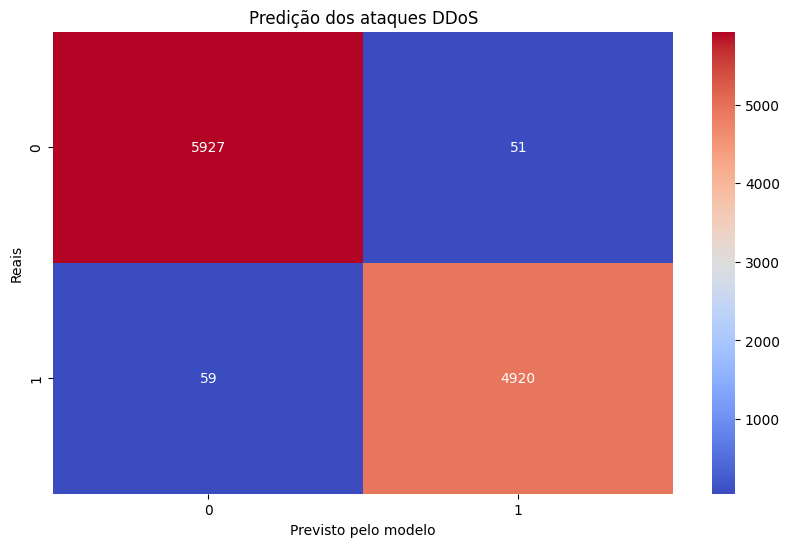

In [107]:
cm = confusion_matrix(y_val_total, y_pred_val)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Predição dos ataques DDoS')
plt.xlabel('Previsto pelo modelo')
plt.ylabel('Reais')
plt.show()

## Validação Final Externa

In [108]:
y_pred_test = model.predict(X_test_final_scaled_df)

In [109]:
y_pred_test

array([ 1,  1,  1, ..., -1, -1, -1], shape=(5223,))

In [110]:
y_pred_test = np.where(y_pred_test == -1, 1, 0)

In [111]:
y_pred_test

array([0, 0, 0, ..., 1, 1, 1], shape=(5223,))

In [112]:
y_val.isna().sum()

np.int64(0)

In [113]:
predict = classification_report(y_test_final, y_pred_test, digits=4)
print(predict)

              precision    recall  f1-score   support

           0     1.0000    0.9892    0.9945      3134
           1     0.9840    1.0000    0.9919      2089

    accuracy                         0.9935      5223
   macro avg     0.9920    0.9946    0.9932      5223
weighted avg     0.9936    0.9935    0.9935      5223



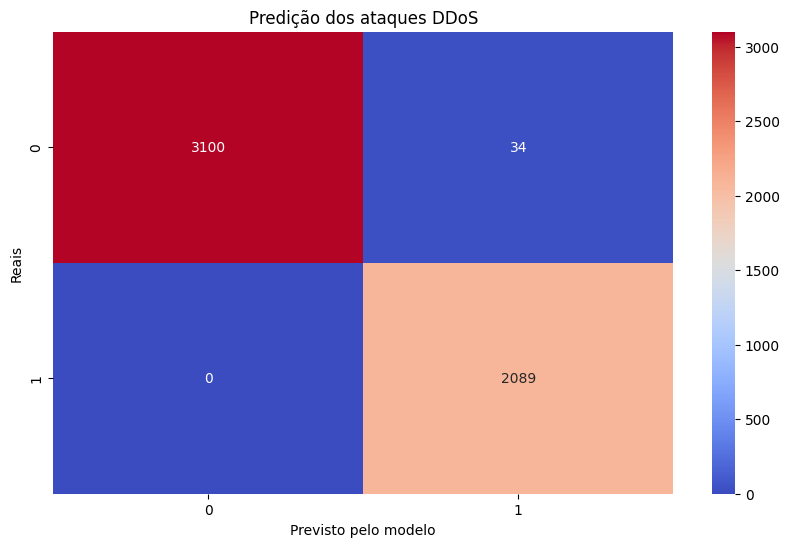

In [114]:
cm = confusion_matrix(y_test_final, y_pred_test)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Predição dos ataques DDoS')
plt.xlabel('Previsto pelo modelo')
plt.ylabel('Reais')
plt.show()

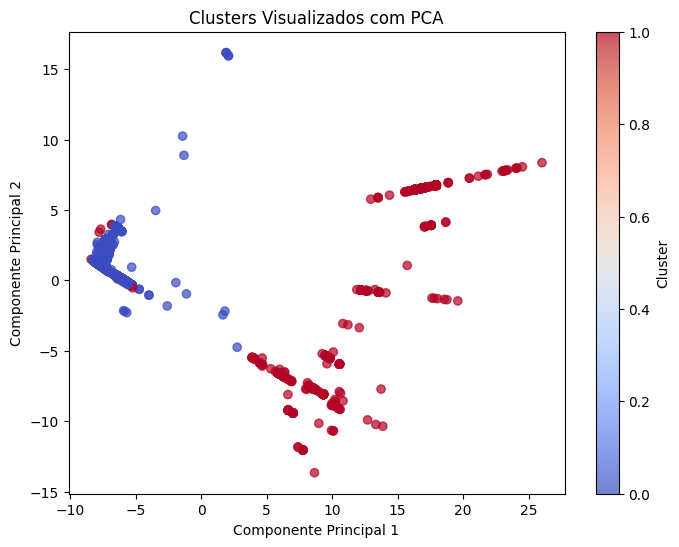

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test_final_scaled_df)

plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_test,cmap='coolwarm', alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters Visualizados com PCA')
plt.colorbar(label='Cluster')
plt.show()
